In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Housing.csv")

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

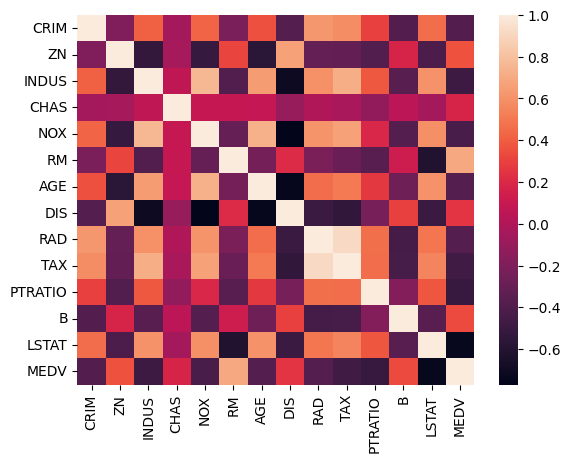

In [ ]:
# plotting and displaying correlation heatmap

dataplot = sb.heatmap(df.corr(), annot=False)
mp.show()

In [ ]:
df.drop(["DIS","CHAS","B"],axis=1,inplace=True)

In [ ]:
df.iloc[100]

CRIM         0.14866
ZN           0.00000
INDUS        8.56000
NOX          0.52000
RM           6.72700
AGE         79.90000
RAD          5.00000
TAX        384.00000
PTRATIO     20.90000
LSTAT        9.42000
MEDV        27.50000
Name: 100, dtype: float64

In [ ]:
print(df.describe())

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              RAD         TAX     PTRATIO       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     9.549407  408.237154   18.455534   12.653063   22.532806  
std      8.707259  168.537116    2.164946    7.141062    9.197104 

In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1),
                                                    df['MEDV'],
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
#calculating the mean squared error

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 26.12867107545151


In [ ]:
# make predictions on the test set
# compute the RMSE score

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

Root_mean_sqd_error = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", Root_mean_sqd_error )

RMSE: 5.111621178789711


In [ ]:
# create a new DataFrame with the custom input values

custom_input = pd.DataFrame({
    'CRIM': [0.147],
    'ZN': [0],
    'INDUS': [8.50],
    'NOX': [0.53],
    'RM': [6.728],
    'AGE': [79.5],
    'RAD': [5],
    'TAX': [385],
    'PTRATIO':[20.9],
     #'B':[88],
    'LSTAT':[9.42]
})


In [ ]:
# scale the input values using the same scaling parameters as the training set
custom_input_scaled = scaler.transform(custom_input)

# make a prediction using the trained model
prediction = model.predict(custom_input_scaled)

# print the predicted value
print("Predicted value:", prediction[0])

Predicted value: 23.697066328954445
